## Problem 1 – Vasicek-modellen og rentestrukturen

Formålet med denne opgave er at bruge Vasicek-modellen til at udlede hele terminsstrukturen af renter, dvs.:
- prisen på en nulkuponobligation \( p(t,T) \),
- spotrenten \( R(t,T) \),
- og den øjeblikkelige forward-rente \( f(t,T) \).

Vasicek-modellen beskriver kort-renten \( r_t \) som:
\[
dr_t = (b - a r_t) dt + \sigma dW_t
\]
hvor:
- \( a > 0 \) = mean-reversion hastigheden,  
- \( b/a \) = langsigtet ligevægtsrente,  
- \( \sigma \) = volatilitet,  
- \( W_t \) = Brownsk bevægelse.

---

### (a) Udled affine udtryk for obligationspriser, spotrenter og forwardrenter

####  Formål og intuition
I Vasicek-modellen er obligationsprisen \( p(t,T) \) en *affin funktion* af den nuværende rente \( r_t \):
\[
p(t,T) = \exp(A(t,T) - B(t,T)r_t)
\]
Det betyder, at log-prisen afhænger lineært af \( r_t \).

De funktioner \( A(t,T) \) og \( B(t,T) \) beskriver, hvordan renten påvirker diskonteringsfaktoren over tid:

\[
B(t,T) = \frac{1 - e^{-a(T-t)}}{a}
\]
\[
A(t,T) = \left(b - \frac{\sigma^2}{2a^2}\right)(B(t,T) - (T-t)) - \frac{\sigma^2}{4a}B(t,T)^2
\]

Når vi kender \( A \) og \( B \), kan vi finde:
- **Zero coupon-prisen:** \( p(t,T) \)
- **Spotrenten:** \( R(t,T) = -\frac{1}{T-t} \ln p(t,T) \)
- **Forwardrenten:** \( f(t,T) = -\frac{\partial \ln p(t,T)}{\partial T} \)

**Intuition:**  
- \( B(t,T) \) viser, hvor følsom obligationsprisen er over for kort-renten.  
- \( A(t,T) \) indeholder rentens forventede mean-reversion og volatilitet.  
- Den affine struktur betyder, at alt kan beregnes analytisk.

---

### (b) Implementér tre Python-funktioner

####  Formål
At kode funktionerne til at beregne \( p(t,T) \), \( R(t,T) \) og \( f(t,T) \) som funktion af parametrene \( a, b, \sigma, T \) og den aktuelle kort-rente \( r \).

**Intuition:**  
Når vi kan kode disse funktioner, kan vi tegne hele terminsstrukturen for renter givet markedsparametre.

---

### (c) Plot terminsstrukturen for zero coupon-priser, spotrenter og forwardrenter

#### Formål
At se, hvordan rentestrukturen ser ud for en Vasicek-model med parametre:
\[
a = 1, \quad b = 0.04, \quad \sigma = 0.03, \quad r = 0.05
\]

**Intuition:**  
- Hvis den nuværende kort-rente \( r \) er højere end den langsigtede ligevægtsrente \( b/a \), vil kurven være faldende (inverteret).  
- Hvis \( r \) er lavere, bliver kurven stigende.  
- Zero coupon-priser falder altid med løbetid, mens spot- og forwardrenter viser markedets forventede udvikling i renteniveauet.

**Fortolkning:**  
Ved \( r = 0.05 > b/a = 0.04 \) forventer vi en *faldende* spot- og forwardkurve – dvs. markedsrenterne forventes at falde mod den langsigtede ligevægt.

---

### (d) Find den stationære middelværdi for kort-renten

#### Formål og intuition
På lang sigt stabiliserer \( r_t \) sig omkring middelværdien:
\[
E[r_\infty] = \frac{b}{a}
\]
Det er den “naturlige” rente, som systemet trækker imod.  
Her er \( b/a = 0.04 \).  
Da \( r_0 = 0.05 > 0.04 \), ligger den aktuelle rente **over** den stationære middelværdi.

**Fortolkning:**  
Dette afspejles i rentestrukturen:
- Spotrenter og forwardrenter er faldende.  
- Markedet forventer, at den korte rente falder tilbage mod 4 % over tid.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- (a) Vasicek term structure functions ---

def B(a, T, t=0):
    return (1 - np.exp(-a*(T - t))) / a

def A(a, b, sigma, T, t=0):
    B_val = B(a, T, t)
    term1 = (b - (sigma**2)/(2*a**2)) * (B_val - (T - t))
    term2 = (sigma**2 / (4*a)) * B_val**2
    return term1 - term2

def zero_coupon_price(a, b, sigma, r, T, t=0):
    """Price of zero coupon bond under Vasicek model"""
    return np.exp(A(a,b,sigma,T,t) - B(a,T,t)*r)

def spot_rate(a, b, sigma, r, T, t=0):
    """Spot rate R(t,T) = -1/(T-t) * ln(p(t,T))"""
    p = zero_coupon_price(a,b,sigma,r,T,t)
    return -np.log(p) / (T - t)

def forward_rate(a, b, sigma, r, T, t=0):
    """Instantaneous forward rate f(t,T) = -∂ln(p)/∂T"""
    B_T = B(a,T,t)
    A_T = A(a,b,sigma,T,t)
    dB_dT = np.exp(-a*(T - t))
    dA_dT = (b - (sigma**2)/(2*a**2)) * (dB_dT - 1) - (sigma**2 / (2*a)) * B_T * dB_dT
    return dA_dT - dB_dT * r


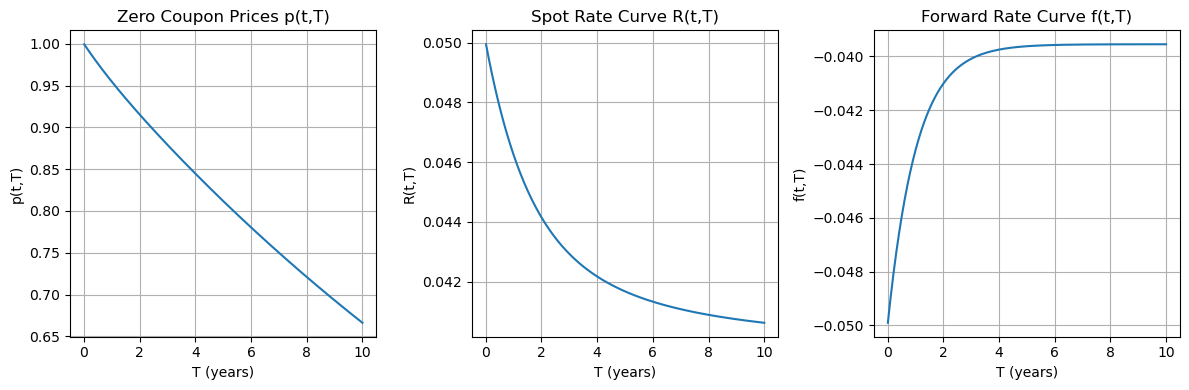

In [2]:
# --- Parameters ---
a, b, sigma, r = 1.0, 0.04, 0.03, 0.05
T_grid = np.linspace(0.01, 10, 200)

# --- Compute values ---
p_vals = [zero_coupon_price(a,b,sigma,r,T) for T in T_grid]
R_vals = [spot_rate(a,b,sigma,r,T) for T in T_grid]
f_vals = [forward_rate(a,b,sigma,r,T) for T in T_grid]

# --- Plot term structures ---
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(T_grid, p_vals)
plt.title("Zero Coupon Prices p(t,T)")
plt.xlabel("T (years)")
plt.ylabel("p(t,T)")
plt.grid(True)

plt.subplot(1,3,2)
plt.plot(T_grid, R_vals)
plt.title("Spot Rate Curve R(t,T)")
plt.xlabel("T (years)")
plt.ylabel("R(t,T)")
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(T_grid, f_vals)
plt.title("Forward Rate Curve f(t,T)")
plt.xlabel("T (years)")
plt.ylabel("f(t,T)")
plt.grid(True)

plt.tight_layout()
plt.show()


In [3]:
stationary_mean = b / a
print(f"Stationær middelværdi af kort-renten: {stationary_mean:.4f}")
print(f"Aktuel kort-rente r = {r:.4f}")

if r > stationary_mean:
    print("=> Den nuværende rente er OVER ligevægtsrenten → kurverne bliver faldende.")
else:
    print("=> Den nuværende rente er UNDER ligevægtsrenten → kurverne bliver stigende.")


Stationær middelværdi af kort-renten: 0.0400
Aktuel kort-rente r = 0.0500
=> Den nuværende rente er OVER ligevægtsrenten → kurverne bliver faldende.


Økonomisk fortolkning

Vasicek-modellen antager, at kort-renten bevæger sig tilfældigt, men altid med en kraft der trækker den mod ligevægten b/a.

Når den aktuelle rente er højere end ligevægten, forventes den at falde → faldende spot- og forwardkurver.

Når den aktuelle rente er lavere, forventes den at stige → stigende kurver.